In [62]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [119]:
# PIMA INDIANS DATASET

# Escribe el código para cargar el archivo. Se llama 'pima-indians-diabetes.csv'
diabetes  = pd.read_csv('datasets/pima-indians-diabetes.csv')

# Muestra los primeros renglones de la tabla
diabetes.head()

,Times_Pregnant,Glucose_Conc,Diastolic_Pressure,Triceps_Thickness,Insulin,Body_Mass_Index,Diabetes_Pedigree,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
interest = diabetes.columns[2:4]
diabetes = diabetes.drop(columns = 'Insulin')
diabetes = diabetes[diabetes[interest[0]] > 0]
diabetes = diabetes[diabetes[interest[1]] > 0]
diabetes.head()

,Times_Pregnant,Glucose_Conc,Diastolic_Pressure,Triceps_Thickness,Body_Mass_Index,Diabetes_Pedigree,Age,Diabetes
0,6,148,72,35,33.6,0.627,50,1
1,1,85,66,29,26.6,0.351,31,0
3,1,89,66,23,28.1,0.167,21,0
4,0,137,40,35,43.1,2.288,33,1
6,3,78,50,32,31.0,0.248,26,1


In [121]:
# ¿Cuántos renglones y cuántas columnas tiene la tabla?
# Imprime el resultado
print('renglones:',  diabetes.shape[0] )
print('columnas:',  diabetes.shape[1])

renglones: 539
columnas: 8


In [122]:
# La variable a predecir es si la persona presenta diabetes (es la última columna)
# Guarda las primeras columnas en una variable llamada X y la variable a predecir en una variable llamada Y.
X = diabetes.drop(columns='Diabetes')
Y = diabetes['Diabetes']

In [123]:
# Ahora separa en grupos de entrenamiento y grupos de prueba
# Usa la función train_test_split de sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 52 )

# Crea un modelo de red neuronal sequencial

In [130]:
input_shape = 7

In [155]:
# Crea un modelo secuencial 
modelo = Sequential()

# Agrega la primera capa. Recuerda que la primera capa necesita saber cuántos atributos de entrada hay.
# Usa una función de activación ReLu
modelo.add(Dense(units=16, activation='relu', input_shape= (input_shape, )))

# Agrega más capas al modelo. Puedes poner las capas y neuronas que creas convenientes.
modelo.add(Dense(units=8, activation='relu'))
modelo.add(Dense(units=4, activation='relu'))

# Agrega la capa de salida. Es un problema de clasificación binaria. ¿Cuál es la función de activación correcta?
modelo.add(Dense(units=1, activation='sigmoid'))

In [156]:
# Revisa tu modelo. Utiliza la función summary para ver cómo quedó.
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_45 (Dense)             (None, 16)                128       
_________________________________________________________________
dense_46 (Dense)             (None, 8)                 136       
_________________________________________________________________
dense_47 (Dense)             (None, 4)                 36        
_________________________________________________________________
dense_48 (Dense)             (None, 1)                 5         
Total params: 305
Trainable params: 305
Non-trainable params: 0
_________________________________________________________________


In [157]:
# Es hora de compilar el modelo. Hay que decidir el optimizador, la función de costo y las métricas.
# Completa la siguiente línea con los parámetros requeridos.

# Los optimizadores pueden ser 'adam' o 'sgd'
# En métricas utilizamos ['accuracy']
# Es un problema de clasificación. ¿Cómo se llama la función de costo para este caso? 
# Las opciones son ('mse', 'categorical_crossentropy' o 'binary_crossentropy')

modelo.compile(loss= 'binary_crossentropy'   , optimizer= 'adam'  , metrics= ['accuracy']  )

In [158]:
# Ahora entrena el modelo. Usa el 10 porciento de los datos para ver cómo va mejorando la métrica.
# Hay que definir también un tamaño de paso 'batch_size' y las épocas ('epochs')
history = modelo.fit(X_train, y_train, epochs= 40  , batch_size= 10  , verbose=False, validation_split=  0.1 )

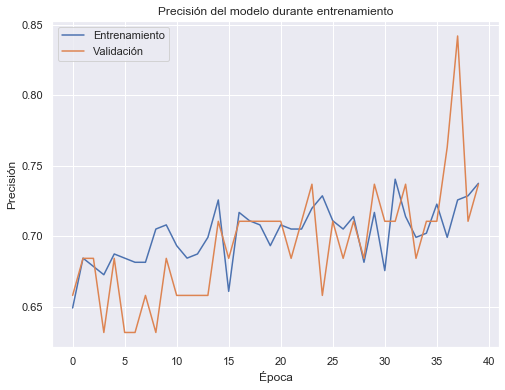

Precisión en datos de prueba: 0.71


In [159]:
# Vamos a ver cómo quedó el modelo.
# Completa los datos que hay que mandar a la función de evaluar
costo, precisión  = modelo.evaluate( X_test, y_test , verbose=False)

## Graficar los resultados
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
plt.figure(figsize=(8,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Precisión del modelo durante entrenamiento')
plt.ylabel('Precisión')
plt.xlabel('Época')
plt.legend(['Entrenamiento', 'Validación'], loc='best')
plt.show()

print(f'Precisión en datos de prueba: {precisión:.3}')

# Predicciones

In [170]:
# Ahora vamos a utilizar los datos de prueba para ver que tan bueno es el modelo
# Usa el método predict para obtener los resultados de los datos X_tes
prediccion = modelo.predict( X_test   )

# Ahora define un punto de corte para asignar si la persona tiene diabetes o no
corte = 0.65

prediccion_si_no = np.squeeze(1*(prediccion>corte))

In [171]:
# Ahora veamos cómo se comparan los valores reales contra los predichos.
pd.crosstab(prediccion_si_no, y_test, rownames=['Predicción'], colnames=['Valor Real'])

# Qué pasa si cambias el punto de corte? Cambia el valor en la celda anterior y prueba otra vez,

Valor Real,0,1
Predicción,,
0,107,40
1,5,10
